# <center> 👉 class_12_3 DL » _Face Detection from video_ </center>

## ▣ Detect faces from video and Displays result in realtime

Populating the interactive namespace from numpy and matplotlib


C:\Users\Owner\AppData\Roaming\Python\Python36\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


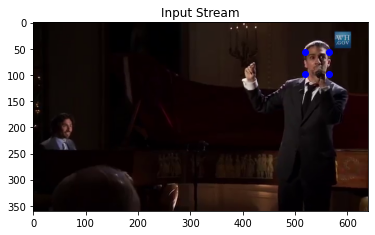

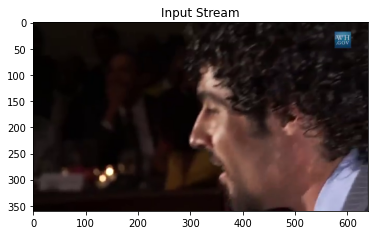

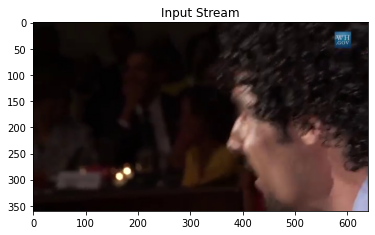

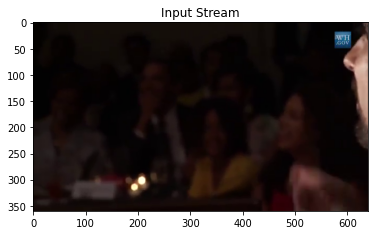

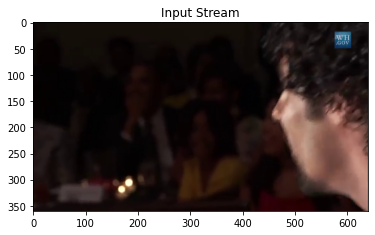

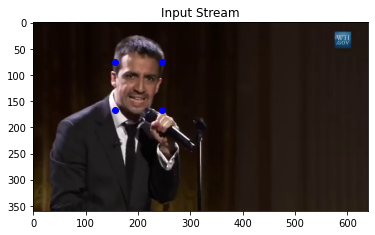

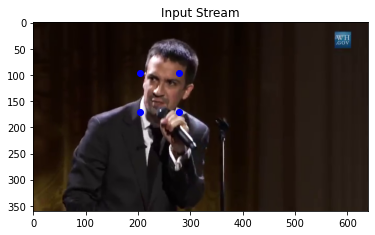

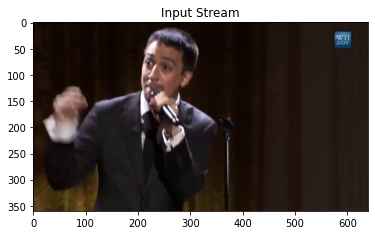

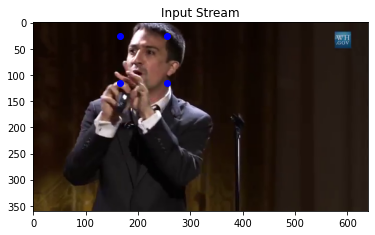

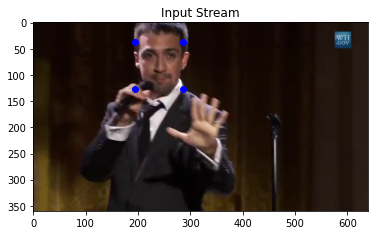

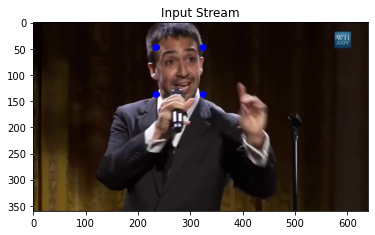

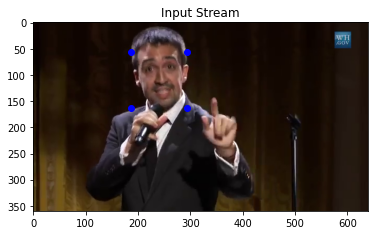

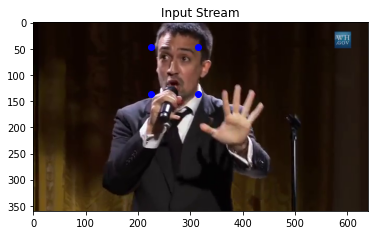

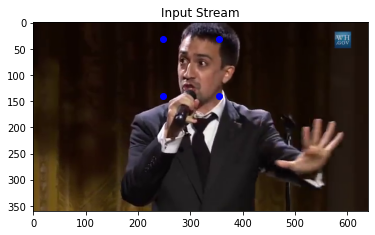

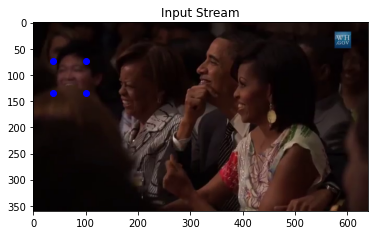

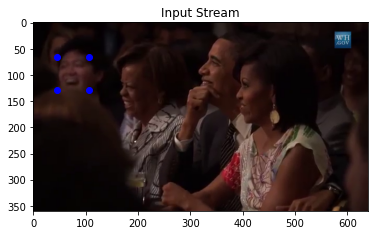

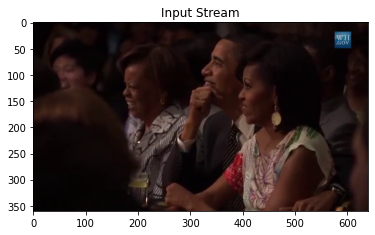

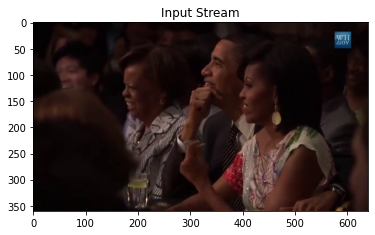

In [2]:
%pylab inline 
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt  

video_capture = cv2.VideoCapture("./Videos/short_hamilton_clip.mp4")
frame_count = 0

while video_capture.isOpened():    
    ret, frame = video_capture.read()
    if not ret:
        video_capture.release()
        break
    
    frame_count += 1
    if frame_count % 15 == 0:    # search face in every 15 frames to speed up process.
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        title("Input Stream")
        plt.imshow(frame)        
        rgb_frame = frame[:, :, ::-1]  # Find all the faces and face encodings
        face_locations = face_recognition.face_locations(rgb_frame)
        
        for face_location in face_locations:       # mark it on frame with blue dots
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')

        plt.show() 
        
        clear_output(wait=True) # ... and hold it until a new frame appears
        
        key = cv2.waitKey(1) 
        if key == 27:
            break
video_capture.release()
cv2.destroyAllWindows()

## Face Recognition : Comparison of images

In [7]:
import cv2
import face_recognition

img1 = cv2.imread("./images/messi2.jpeg")
rgb_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_encoding = face_recognition.face_encodings(rgb_img1)[0]
img2 = cv2.imread("./images/messi5.jpg")
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_encoding = face_recognition.face_encodings(rgb_img2)[0]

result = face_recognition.compare_faces([img1_encoding], img2_encoding)
print("Result: ", result)

Result:  [True]


## Face recognition in real-time on a webcam  
https://pysource.com/2021/08/16/face-recognition-in-real-time-with-opencv-and-python/

In [9]:
import face_recognition
import cv2
import os
import glob
import numpy as np

class SimpleFacerec:
    def __init__(self):
        self.known_face_encodings = []
        self.known_face_names = []

        # Resize frame for a faster speed
        self.frame_resizing = 0.25

    def load_encoding_images(self, images_path):
        """
        Load encoding images from path
        :param images_path:
        :return:
        """
        # Load Images
        images_path = glob.glob(os.path.join(images_path, "*.*"))

        print("{} encoding images found.".format(len(images_path)))

        # Store image encoding and names
        for img_path in images_path:
            img = cv2.imread(img_path)
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Get the filename only from the initial file path.
            basename = os.path.basename(img_path)
            (filename, ext) = os.path.splitext(basename)
            # Get encoding
            img_encoding = face_recognition.face_encodings(rgb_img)[0]

            # Store file name and file encoding
            self.known_face_encodings.append(img_encoding)
            self.known_face_names.append(filename)
        print("Encoding images loaded")

    def detect_known_faces(self, frame):
        small_frame = cv2.resize(frame, (0, 0), fx=self.frame_resizing, fy=self.frame_resizing)
        # Find all the faces and face encodings in the current frame of video
        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
        rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(self.known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(self.known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = self.known_face_names[best_match_index]
            face_names.append(name)

        # Convert to numpy array to adjust coordinates with frame resizing quickly
        face_locations = np.array(face_locations)
        face_locations = face_locations / self.frame_resizing
        return face_locations.astype(int), face_names

In [12]:
import cv2
# from simple_facerec import SimpleFacerec

# Encode faces from a folder
sfr = SimpleFacerec()
sfr.load_encoding_images("./images/faces")  

# Load Camera
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    # Detect Faces
    face_locations, face_names = sfr.detect_known_faces(frame)
    for face_loc, name in zip(face_locations, face_names):
        y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]
#         print(face_loc)
        cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 200), 2)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)
        
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1)
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()        

16 encoding images found.
Encoding images loaded
